# Oasis Infobyte Data Science Internship

## Task 3: Car Price Prediction 

### Shayan Chakraborty

### Importing Libraries and Packages

In [406]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [407]:
cars = pd.read_csv("./csv_files/car data.csv")
cars

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [408]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [409]:
cars.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [410]:
cars.shape

(301, 9)

In [411]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [412]:
cars = cars.drop_duplicates()

In [413]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [414]:
cars.dropna(inplace=True)

In [415]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [416]:
cars.drop(["Owner"], axis=1, inplace=True)


In [417]:
print("\nNull values:")

print(cars.isnull().sum())


Null values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
dtype: int64


In [418]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual


In [419]:
cars.describe()

,Year,Selling_Price,Present_Price,Driven_kms
count,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508
std,2.896868,4.984240,8.566332,39015.170352
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.850000,1.200000,15000.000000
50%,2014.000000,3.510000,6.100000,32000.000000
75%,2016.000000,6.000000,9.840000,48883.500000
max,2018.000000,35.000000,92.600000,500000.000000


### Exploratory Data Analysis

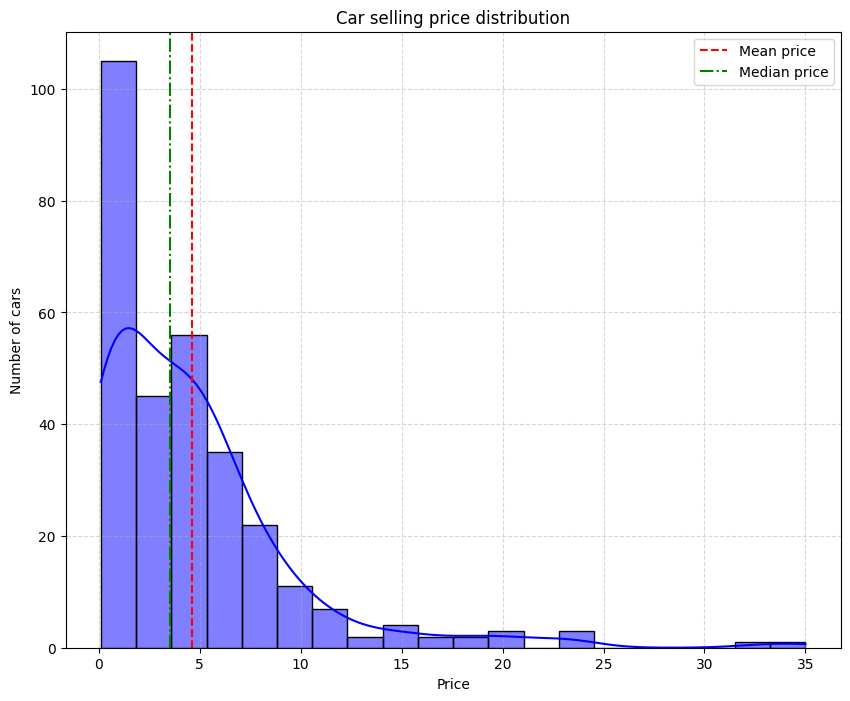

In [420]:
plt.figure(figsize=(10, 8))
sns.histplot(cars['Selling_Price'], color= 'blue', kde=True, bins=20)

plt.title('Car selling price distribution')

plt.xlabel('Price')

plt.ylabel('Number of cars')

plt.axvline(cars['Selling_Price'].mean(), color='red', linestyle='--', label='Mean price')

plt.axvline(cars['Selling_Price'].median(), color='green', linestyle='-.', label='Median price')

plt.legend()

plt.grid(True, linestyle = "--", alpha = 0.5)

plt.show()


<Figure size 1500x1000 with 0 Axes>

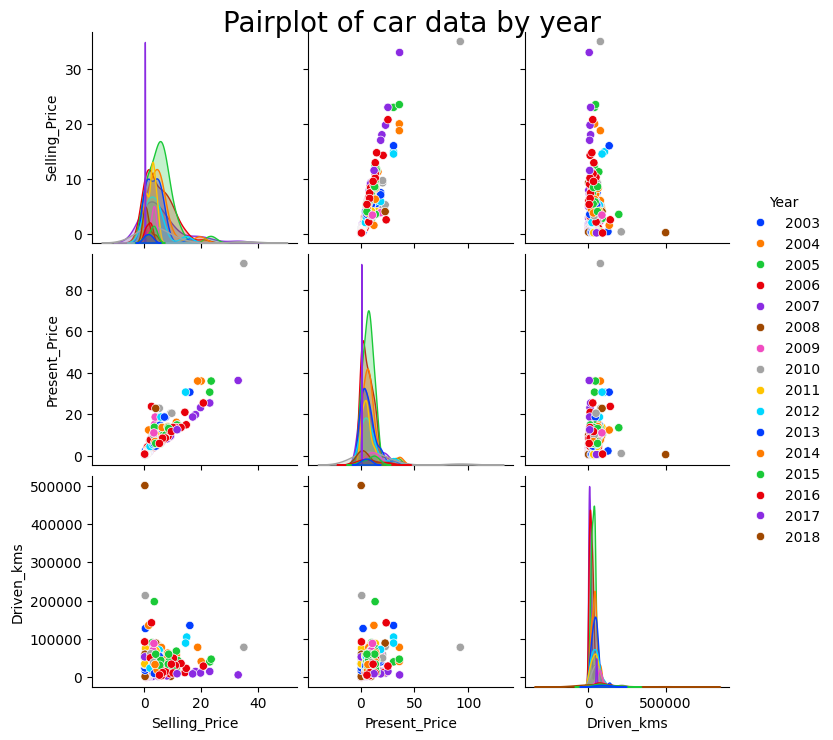

In [421]:
plt.figure(figsize=(15, 10))

pair_plot = sns.pairplot(cars, hue='Year', palette='bright')

plt.subplots_adjust(top=0.95)

pair_plot.fig.suptitle('Pairplot of car data by year', fontsize=20)


plt.show()



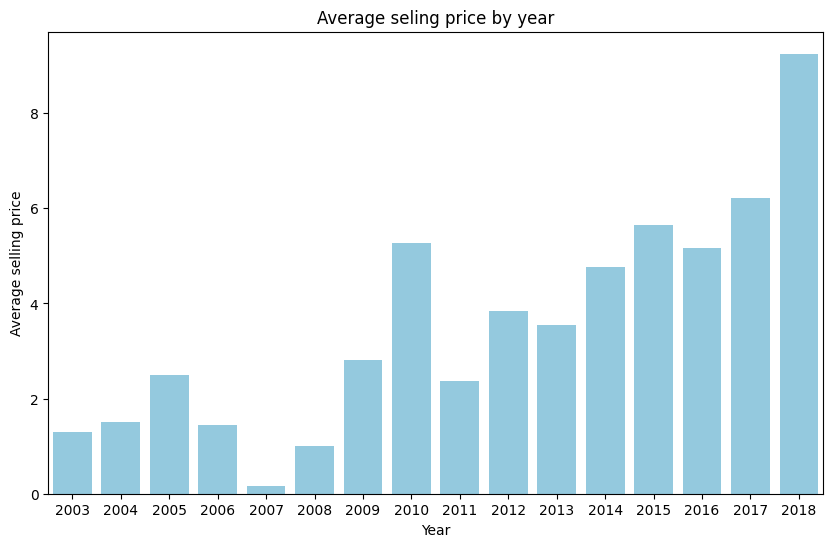

In [422]:
plt.figure(figsize=(10, 6))

avg_price_by_year = cars.groupby('Year')['Selling_Price'].mean().reset_index()

sns.barplot(x='Year', y='Selling_Price', data=avg_price_by_year, color = "skyblue")

plt.title('Average seling price by year')

plt.xlabel('Year')
plt.ylabel('Average selling price')

plt.show()


### Correlation Heatmap

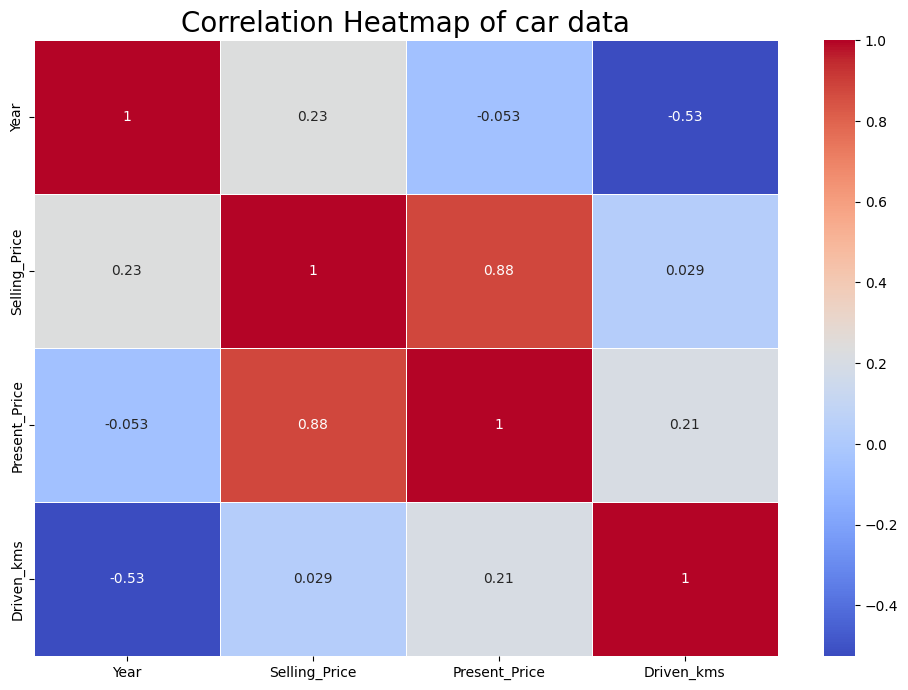

In [423]:
correlation = cars.corr()


plt.figure(figsize=(12, 8))

sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of car data', fontsize=20)

plt.show()

### Feature Selection

In [424]:
features = ['Year', 'Present_Price', 'Driven_kms']

target = 'Selling_Price'

### Train test split

In [425]:
X = cars[features]

y = cars[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

### Feature Scaling

In [426]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

### Model building

In [427]:
linear_model = LinearRegression()

linear_model.fit(X_train_scaled, y_train)

LinearRegression()

### Model evaluation on training

In [428]:
y_pred_train = linear_model.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)

r2_train = r2_score(y_train, y_pred_train)

print("Training Mean squared error:", mse_train)

print("Training R squared:", r2_train)

Training Mean squared error: 4.005186262517852
Training R squared: 0.8497648518261761


### Model evaluation on test 

In [429]:
y_pred_test = linear_model.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_pred_test)

r2_test = r2_score(y_test, y_pred_test)

print("Test mean squared error:", mse_test)

print("Test R squared:", r2_test)

Test mean squared error: 2.948739722662656
Test R squared: 0.8137545483035529


### Model Prediction and inference

In [430]:
new_data = pd.DataFrame({'Year': [2014, 2013],
                         'Present_Price': [5.59, 9.54],
                         'Driven_kms': [27000, 43000]})

# feature scaling for new data
new_data_scaled = scaler.transform(new_data)


predicted_prices = linear_model.predict(new_data_scaled)

print("Predicted selling price for new data\n")

for i in range(len(new_data)):
    
     print("Car " + str(i+1) + ": " + "{:.2f}".format(predicted_prices[i]))

Predicted selling price for new data

Car 1: 3.82
Car 2: 5.35


In [431]:
print (f"The R Squared value of the model for training data is {(r2_train*100):.2f} % \nFor the test data is {(r2_test*100):.2f} % ")

The R Squared value of the model for training data is 84.98 % 
For the test data is 81.38 % 


## Description of the project



### Importing the libraries and packages

#### Firstly we import all the necessary libraries like Numpy, pandas, matplotlib, scikit learn and seaborn


### Loading the dataset


#### When the loading of the dataset is successful we perform various types of analysis on it with head() , tail(), info(), describe()

### Data Cleaning

#### We remove the duplicates and the missing values using drop_duplicates() and dropna() and also remove the unnecessary columns that are there in the dataset. 

#### Then we check for null values using isnull().sum()




### Exploratory Data Analysis


#### After that we perform exploratory data analysis on the cleaned up data and try to understand the relationships between the selling price of the car and the other factors like year, count, etc.


#### Pairplots, barplots, scatterplots and correlation heatmap has helped us to do that


### Feature selection


#### We then perform feature selection by selecting the target variable: Selling_Price and the features: features = Year, Present_Price, Driven_kms


### Train test split


#### We split the data into train and test datasets for training and testing the machine learning model. The split is 80 20 here. 80% for training and 20% for testing the model.

### Feature Scaling

#### It is done to normalize the range of the features in the cars dataset.



### Model Building and evaluation


#### A linear regression model is built and then evaluated separately based on the training and test data.


#### The evaluation of the model is done by Mean Squared Error and R squared . The accuracy comes out to be 81.38%


### Model Prediction and Inference

#### We then use the model to perform a prediction on a new data and draw the inference

